In [1]:
# import libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam

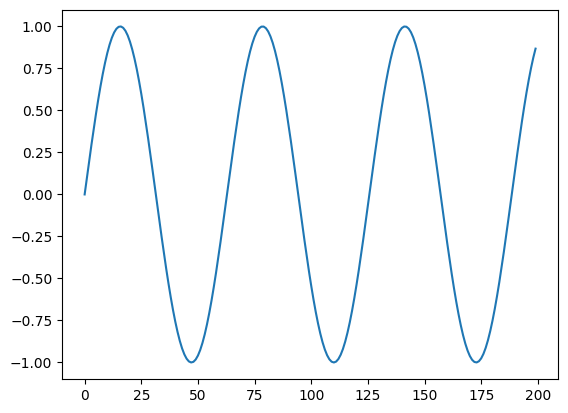

In [2]:
# create data
series = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1

#plot it
plt.plot(series)
plt.show()

In [3]:
#Build our dataset
# we use t=10 past values to predict next step

T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [4]:
#try autoregressive linear model
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss = 'mse',
              optimizer = Adam(lr = 0.1),)

# train the RNN
r = model.fit (X[:-N//2], Y[:-N//2], epochs = 80, validation_data = (X[-N//2:], Y[-N//2:]),)

Epoch 1/80
3/3 [==============================] - 1s 177ms/step - loss: 3.3947 - val_loss: 3.3561
Epoch 2/80
3/3 [==============================] - 0s 31ms/step - loss: 3.3224 - val_loss: 3.2886
Epoch 3/80
3/3 [==============================] - 0s 43ms/step - loss: 3.2529 - val_loss: 3.2219
Epoch 4/80
3/3 [==============================] - 0s 43ms/step - loss: 3.1855 - val_loss: 3.1556
Epoch 5/80
3/3 [==============================] - 0s 42ms/step - loss: 3.1125 - val_loss: 3.0909
Epoch 6/80
3/3 [==============================] - 0s 47ms/step - loss: 3.0446 - val_loss: 3.0272
Epoch 7/80
3/3 [==============================] - 0s 70ms/step - loss: 2.9816 - val_loss: 2.9639
Epoch 8/80
3/3 [==============================] - 0s 74ms/step - loss: 2.9163 - val_loss: 2.9014
Epoch 9/80
3/3 [==============================] - 0s 80ms/step - loss: 2.8484 - val_loss: 2.8408
Epoch 10/80
3/3 [==============================] - 0s 86ms/step - loss: 2.7876 - val_loss: 2.7806
Epoch 11/80
3/3 [===========

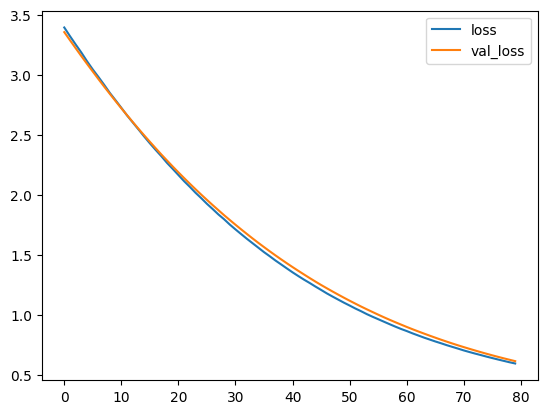

In [5]:
# Plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [6]:
# "Wrong prediction forecast using true targets"

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1

  #update the predictions list
  validation_predictions.append(p)

1/1 [==============================] - 0s 23ms/step


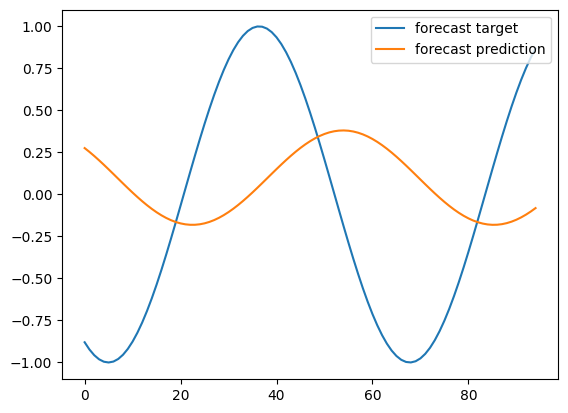

In [7]:
plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

In [8]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] #1=D array of length

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] #1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 26ms/step


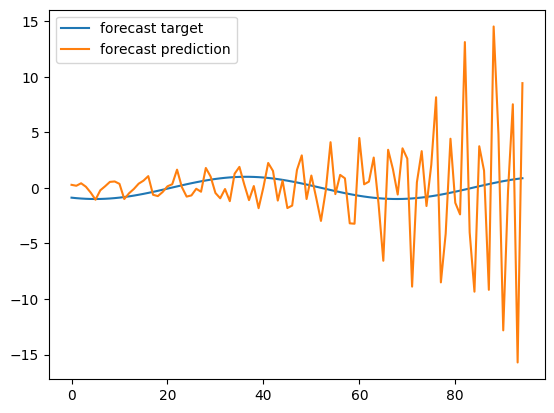

In [9]:
plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()